In [1]:
import numpy as np
import pysam
import matplotlib.pyplot as plt

In [2]:
bamfile = pysam.AlignmentFile('/t1-data/user/lhentges/bams/benchmark_CTCF_CD_sorted.bam')

In [3]:
chrom_list = []
for i, r in enumerate(bamfile.header['SQ']):
    chrom = r['SN']
    chrom_length = r['LN']
    chrom_list.append([chrom, chrom_length])

In [4]:
print(chrom_list)

[['chrM', 16571], ['chr1', 249250621], ['chr2', 243199373], ['chr3', 198022430], ['chr4', 191154276], ['chr5', 180915260], ['chr6', 171115067], ['chr7', 159138663], ['chr8', 146364022], ['chr9', 141213431], ['chr10', 135534747], ['chr11', 135006516], ['chr12', 133851895], ['chr13', 115169878], ['chr14', 107349540], ['chr15', 102531392], ['chr16', 90354753], ['chr17', 81195210], ['chr18', 78077248], ['chr19', 59128983], ['chr20', 63025520], ['chr21', 48129895], ['chr22', 51304566], ['chrX', 155270560], ['chrY', 59373566]]


In [5]:
chrom = ['chr21', 48129895]

In [6]:
read_file = bamfile.fetch(chrom[0])
L_array = np.zeros(chrom[1])
R_array = np.zeros(chrom[1])

for read in read_file:
    if read.template_length>0:
        L_array[read.reference_start:read.reference_end]+=1
    else:
        R_array[read.reference_start:read.reference_end]+=1
    
bamfile.close()

In [7]:
left_coord = 11186000
right_coord = 11188500

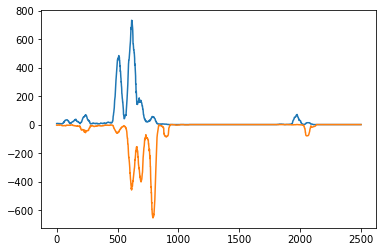

In [8]:
plt.plot(L_array[left_coord:right_coord])
plt.plot(-1*R_array[left_coord:right_coord])
plt.show()

In [9]:
chrom = ['chrM', 16571]

In [11]:
bamfile = pysam.AlignmentFile('/t1-data/user/lhentges/bams/benchmark_CTCF_CD_sorted.bam')

read_file = bamfile.fetch(chrom[0])
L_array = np.zeros(chrom[1])
R_array = np.zeros(chrom[1])

for read in read_file:
    if read.template_length>0:
        L_array[read.reference_start:read.reference_end]+=1
    else:
        R_array[read.reference_start:read.reference_end]+=1
    
bamfile.close()

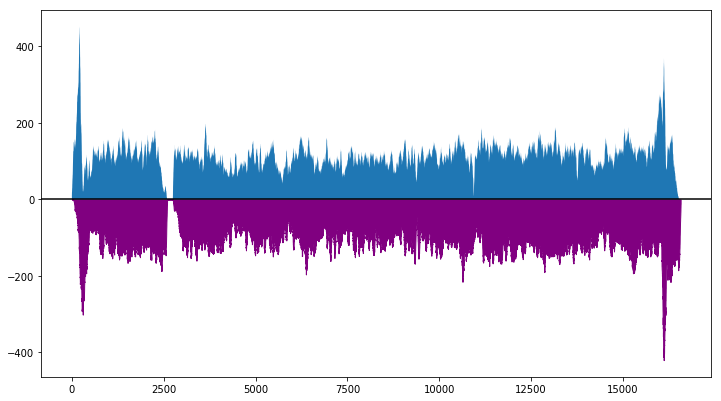

In [24]:
fig, ax = plt.subplots(figsize=(12, 6.75))
ax.axhline(0, color='black')
ax.fill_between(range(chrom[1]), 0, L_array)
ax.fill_between(range(chrom[1]), 0, -1*R_array, color='purple')
plt.show()